## Convolutional Neural Networks

## Image recognition system capable of recognizing objects

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import keras

Using TensorFlow backend.


In [4]:
from keras.datasets import cifar10

In [5]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

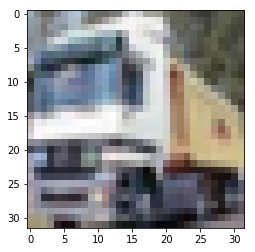

In [7]:
plt.imshow(X_train[1])

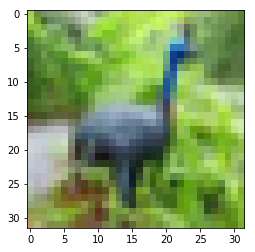

In [8]:
plt.imshow(X_train[6])

In [9]:
X_train = X_train.astype('float32') / 255.0

In [11]:
X_test = X_test.astype('float32') / 255.0

In [12]:
y_train.shape

(50000, 1)

In [13]:
from keras.utils.np_utils import to_categorical

In [14]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [15]:
y_train_cat.shape

(50000, 10)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [17]:
model = Sequential()

model.add(Conv2D(32 , (3,3), padding="same",
                input_shape = (32, 32, 3),
                activation='relu'))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))



model.add(Conv2D(64, (3,3),padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics=['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

In [30]:
model.fit(X_train,y_train_cat,
         batch_size=32, 
          epochs=3,
         validation_split =0.3,
         shuffle = True)

Train on 35000 samples, validate on 15000 samples
Epoch 1/3
35000/35000 [==============================] - 225s - loss: 0.6251 - acc: 0.7955 - val_loss: 0.5699 - val_acc: 0.8069
Epoch 2/3
35000/35000 [==============================] - 226s - loss: 0.5894 - acc: 0.8101 - val_loss: 0.6659 - val_acc: 0.7827
Epoch 3/3
35000/35000 [==============================] - 226s - loss: 0.5653 - acc: 0.8181 - val_loss: 0.7488 - val_acc: 0.7615


In [32]:
model.evaluate(X_test, y_test_cat)

 9984/10000 [============================>.] - ETA: 0s

[0.99660817956924441, 0.70709999999999995]